In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('encoded_data.csv', nrows=20000)

In [4]:
cols_name = pd.Series(data=df.columns)
ar_04_beg_col_index = cols_name[cols_name == 'AR_exchange_04'].index[0]
ar_06_beg_col_index = cols_name[cols_name == 'AR_exchange_06'].index[0]
ar_06_end_col_index = cols_name[cols_name == 'AR_eslt_06'].index[0]

wl_AR_cols = cols_name[ar_04_beg_col_index : ar_06_end_col_index+1].tolist()

In [5]:
data = df.drop(columns=wl_AR_cols)
X = data.to_numpy()

sc = StandardScaler()  
X = sc.fit_transform(X)

In [6]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 20000 samples in 1.502s...
[t-SNE] Computed neighbors for 20000 samples in 526.572s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for s

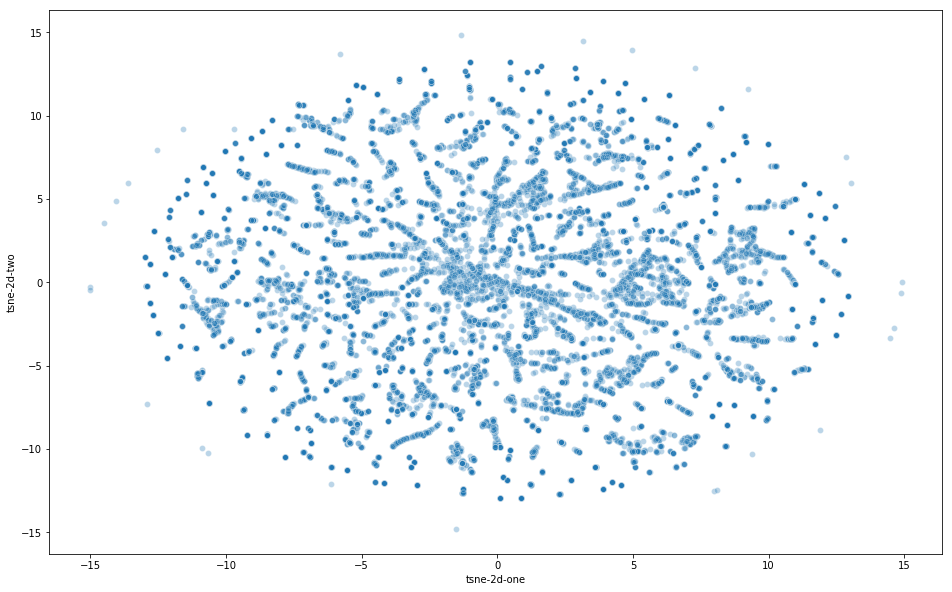

In [7]:
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="target",
    #palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)
plt.savefig('plots/1per-cluster-tsne-profile.png')

In [8]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.0657172  0.02404799 0.01885349]


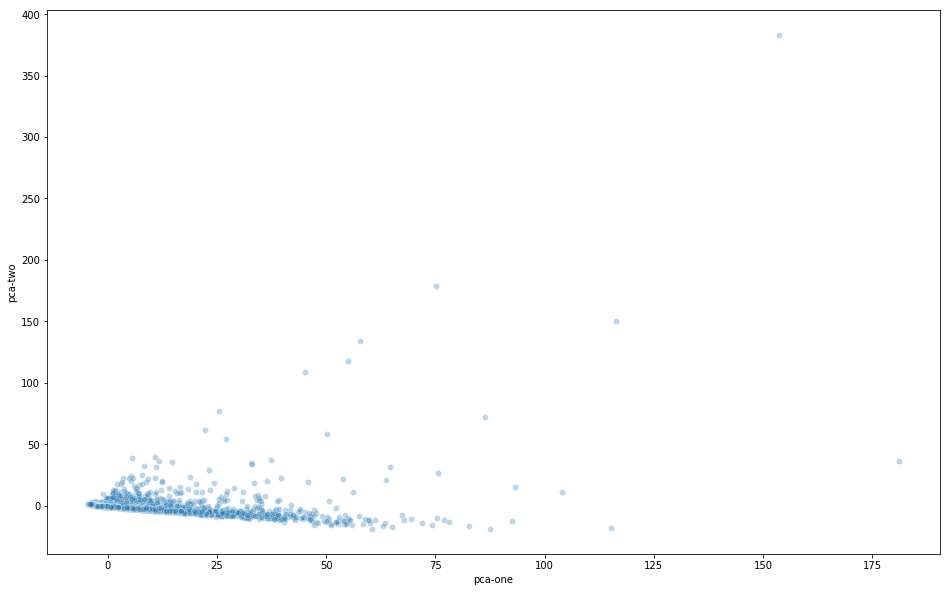

In [10]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
#     hue="target",
    palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)
plt.savefig('plots/1per-cluster-pca-profile.png')

In [11]:
data = df.loc[:, wl_AR_cols]
X = data.to_numpy()

sc = StandardScaler()  
X = sc.fit_transform(X)

In [12]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.588s...
[t-SNE] Computed neighbors for 20000 samples in 15.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

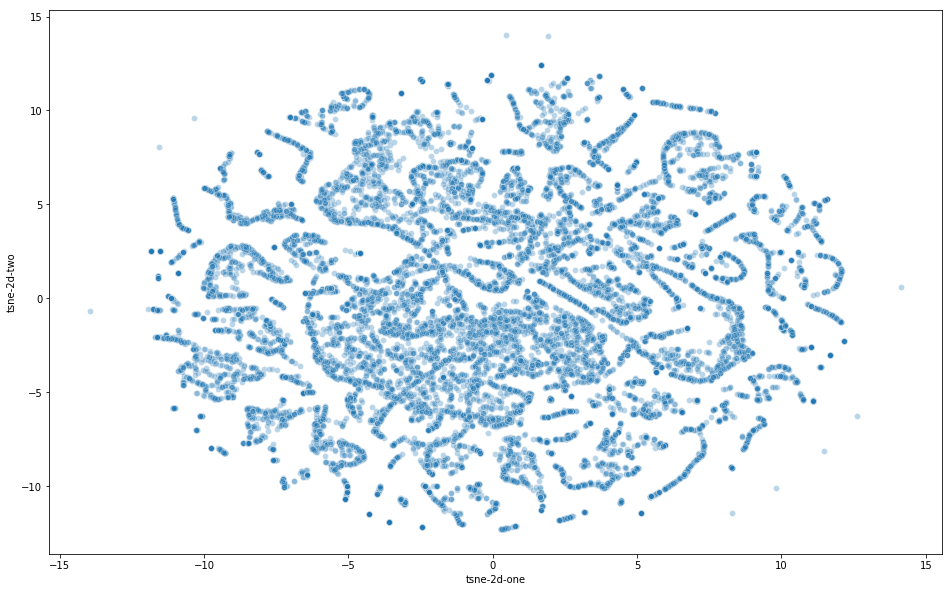

In [14]:
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="target",
    #palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)
plt.savefig('plots/1per-cluster-tsne-usage.png')

In [15]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.31092005 0.2139505  0.11570361]


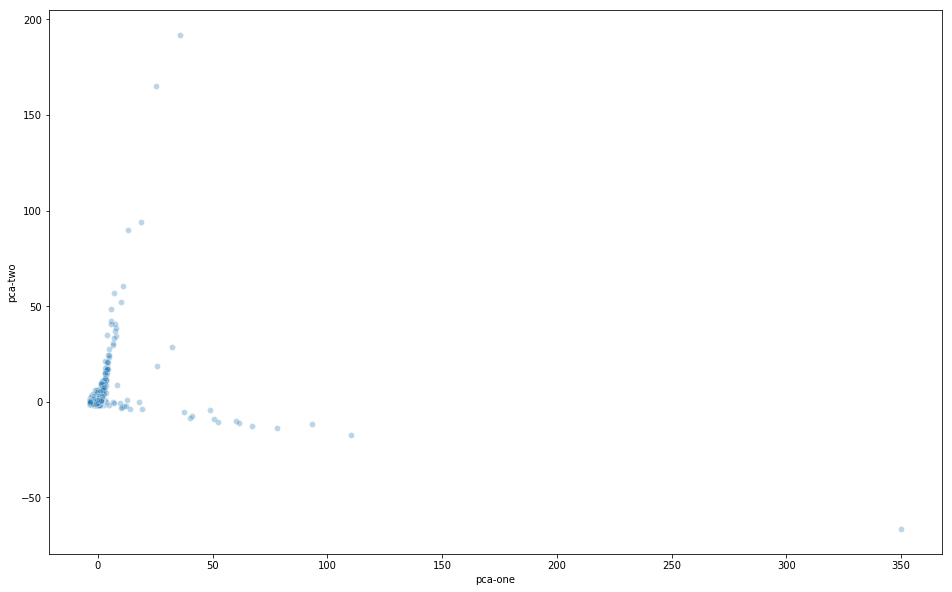

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
#     hue="target",
#     palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)
plt.savefig('plots/1per-cluster-pca-usage.png')